In [ ]:
 #import authentication library 
from google.colab import auth 
auth.authenticate_user()

In [ ]:
#use magic command to run the query and display the result
%%bigquery --project practice-250123

WITH past_30_days_transactions AS (  #this common table expression catches only the transactions occurred in the past 30 days
  SELECT
    fullVisitorId,  
    VisitID,
    (totals.totalTransactionRevenue/1000000) as revenue_transactions,  #convert the transaction revenue back to the original currency value - dataset original values were multiplied by 10^6
    DATETIME(TIMESTAMP_SECONDS(visitStartTime)) AS transaction_timestamp, #transform visit date/time into datetime type - originally it was a string
    DATE(DATETIME(TIMESTAMP_SECONDS(visitStartTime))) AS transaction_date  #convert visit date/time to date type - timestamp_seconds function returns timestamp
    FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
   WHERE totals.totalTransactionRevenue IS NOT NULL AND _TABLE_SUFFIX BETWEEN '20170701' AND '20170801') #establish one-month-window analysis
    
 SELECT *
 FROM past_30_days_transactions
 


,fullVisitorId,VisitID,revenue_transactions,transaction_timestamp,transaction_date
0,0794644147217997845,1500063343,78.33,2017-07-14 20:15:43,2017-07-14
1,9104901150360487546,1500043639,110.99,2017-07-14 14:47:19,2017-07-14
2,7063315126654210750,1500073970,36.94,2017-07-14 23:12:50,2017-07-14
3,3968161907727043413,1500066186,86.99,2017-07-14 21:03:06,2017-07-14
4,4274511861314211339,1500015203,36.00,2017-07-14 07:01:12,2017-07-14
...,...,...,...,...,...
1069,1675608109098320028,1501038383,50.99,2017-07-26 03:06:23,2017-07-26
1070,0743501820485430157,1501034665,60.15,2017-07-26 02:04:25,2017-07-26
1071,1164110348121511511,1500999677,73.98,2017-07-25 16:21:17,2017-07-25
1072,7803437096506812413,1501015763,877.15,2017-07-25 20:49:27,2017-07-25


In [ ]:
#use magic command to run the query and display the result
%%bigquery --project practice-250123

WITH past_30_days_transactions AS (  #this common table expression catches only the transactions occurred in the past 30 days
  SELECT
    fullVisitorId,  
    VisitID,
    (totals.totalTransactionRevenue/1000000) as revenue_transactions,  #convert the transaction revenue back to the original currency value - dataset original values were multiplied by 10^6
    DATETIME(TIMESTAMP_SECONDS(visitStartTime)) AS transaction_timestamp, #transform visit date/time into datetime type - originally it was a string
    DATE(DATETIME(TIMESTAMP_SECONDS(visitStartTime))) AS transaction_date  #convert visit date/time to date type - timestamp_seconds function returns timestamp
    FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
   WHERE totals.totalTransactionRevenue IS NOT NULL AND _TABLE_SUFFIX BETWEEN '20170701' AND '20170801'), #establish one-month-window analysis
    
  all_visits_by_visitor AS (   #create an array to display all the visits by visitor ever
  SELECT
    fullVisitorId,
    ARRAY_AGG( STRUCT( visitID AS visitID_Array,   
        channelGrouping AS channel,
        DATETIME(TIMESTAMP_SECONDS(visitStartTime)) AS visit_time_stamp)
    ORDER BY
      visitID ASC)  #sort by visitID since first visit 
      AS Visit,     #create an array for each visit ID, visit channel and visit datetime
    count(visitID) as visitCount,  #count the total number of visits by visitor 
    ARRAY_AGG(DATETIME(TIMESTAMP_SECONDS(visitStartTime)) #find out first visit date by sorting it 
    ORDER BY
      visitID ASC 
    LIMIT 
      1) AS first_visit_timestamp,
    ARRAY_AGG(DATETIME(TIMESTAMP_SECONDS(visitStartTime)) #catch the last visit date 
    ORDER BY
      VisitId DESC
    LIMIT
      1) AS last_visit_timestamp,
    ARRAY_AGG(channelGrouping   #find out the aquisition channel for the first visit by visitor 
    ORDER BY
      VisitId ASC
    LIMIT
      1) AS acquisition_channel
  FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`
  GROUP BY
    fullVisitorId)

SELECT*
FROM  all_visits_by_visitor
LIMIT 10


,fullVisitorId,Visit,visitCount,first_visit_timestamp,last_visit_timestamp,acquisition_channel
0,0932030655100195779,"[{'visitID_Array': 1495126865, 'channel': 'Org...",1,[2017-05-18 17:01:05],[2017-05-18 17:01:05],[Organic Search]
1,3766105296404373987,"[{'visitID_Array': 1495155928, 'channel': 'Dir...",1,[2017-05-19 01:05:28],[2017-05-19 01:05:28],[Direct]
2,2082914162623094437,"[{'visitID_Array': 1495125136, 'channel': 'Dir...",1,[2017-05-18 16:32:16],[2017-05-18 16:32:16],[Direct]
3,7310098713438932575,"[{'visitID_Array': 1495170995, 'channel': 'Org...",1,[2017-05-19 05:16:35],[2017-05-19 05:16:35],[Organic Search]
4,1387512852706969670,"[{'visitID_Array': 1495143364, 'channel': 'Org...",1,[2017-05-18 21:36:04],[2017-05-18 21:36:04],[Organic Search]
5,9995501684125623331,"[{'visitID_Array': 1495149543, 'channel': 'Org...",1,[2017-05-18 23:19:03],[2017-05-18 23:19:03],[Organic Search]
6,1583347798912116384,"[{'visitID_Array': 1495133054, 'channel': 'Org...",2,[2017-05-18 18:44:14],[2017-05-18 19:23:30],[Organic Search]
7,102929360833194213,"[{'visitID_Array': 1493827733, 'channel': 'Dir...",9,[2017-05-03 16:08:53],[2017-05-25 17:52:05],[Direct]
8,9029966085177570333,"[{'visitID_Array': 1495095912, 'channel': 'Org...",1,[2017-05-18 08:25:12],[2017-05-18 08:25:12],[Organic Search]
9,818516580742711748,"[{'visitID_Array': 1495134409, 'channel': 'Dir...",1,[2017-05-18 19:06:49],[2017-05-18 19:06:49],[Direct]


In [ ]:
#use magic command to run the query and display the result
%%bigquery --project practice-250123

WITH past_30_days_transactions AS (  #this common table expression catches only the transactions occurred in the past 30 days
  SELECT
    fullVisitorId,  
    VisitID,
    (totals.totalTransactionRevenue/1000000) as revenue_transactions,  #convert the transaction revenue back to the original currency value - dataset original values were multiplied by 10^6
    DATETIME(TIMESTAMP_SECONDS(visitStartTime)) AS transaction_timestamp, #transform visit date/time into datetime type - originally it was a string
    DATE(DATETIME(TIMESTAMP_SECONDS(visitStartTime))) AS transaction_date  #convert visit date/time to date type - timestamp_seconds function returns timestamp
    FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
   WHERE totals.totalTransactionRevenue IS NOT NULL AND _TABLE_SUFFIX BETWEEN '20170701' AND '20170801'), #establish one-month-window analysis
    
  all_visits_by_visitor AS (   #create an array to display all the visits by visitor ever
  SELECT
    fullVisitorId,
    ARRAY_AGG( STRUCT( visitID AS visitID_Array,   
        channelGrouping AS channel,
        DATETIME(TIMESTAMP_SECONDS(visitStartTime)) AS visit_time_stamp)
    ORDER BY
      visitID ASC)  #sort by visitID since first visit 
      AS Visit,     #create an array for each visit ID, visit channel and visit datetime
    count(visitID) as visitCount,  #count the total number of visits by visitor 
    ARRAY_AGG(DATETIME(TIMESTAMP_SECONDS(visitStartTime)) #find out first visit date by sorting it 
    ORDER BY
      visitID ASC 
    LIMIT 
      1) AS first_visit_timestamp,
    ARRAY_AGG(DATETIME(TIMESTAMP_SECONDS(visitStartTime)) #catch the last visit date 
    ORDER BY
      VisitId DESC
    LIMIT
      1) AS last_visit_timestamp,
    ARRAY_AGG(channelGrouping   #find out the aquisition channel for the first visit by visitor 
    ORDER BY
      VisitId ASC
    LIMIT
      1) AS acquisition_channel
  FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`
  GROUP BY
    fullVisitorId),

transactions_path_past30days_visits as (  #join all the visits with the transactions from the past 30 days in order to create a filter later on 
SELECT p.*,
v.*
FROM past_30_days_transactions p  #call the common table expressions above 
JOIN all_visits_by_visitor
Using(fullVisitorId)
CROSS JOIN 
UNNEST (Visit) AS v)  #unnest the field to access all the visits 

SELECT *
FROM transactions_path_past30days_visits


,fullVisitorId,VisitID,revenue_transactions,transaction_timestamp,transaction_date,visitID_Array,channel,visit_time_stamp
0,9746124619174084370,1500341097,233.00,2017-07-18 01:24:57,2017-07-18,1483125056,Referral,2016-12-30 19:10:56
1,9746124619174084370,1500341097,233.00,2017-07-18 01:24:57,2017-07-18,1483481962,Referral,2017-01-03 22:19:22
2,9746124619174084370,1500341097,233.00,2017-07-18 01:24:57,2017-07-18,1483490469,Referral,2017-01-04 00:41:09
3,9746124619174084370,1500341097,233.00,2017-07-18 01:24:57,2017-07-18,1487789085,Referral,2017-02-22 18:44:45
4,9746124619174084370,1500341097,233.00,2017-07-18 01:24:57,2017-07-18,1487791475,Referral,2017-02-22 19:24:35
...,...,...,...,...,...,...,...,...
4493,0774683549194942679,1499727488,27.99,2017-07-10 22:58:08,2017-07-10,1499901317,Organic Search,2017-07-12 23:15:17
4494,4218367025544931420,1501526066,618.50,2017-07-31 18:34:26,2017-07-31,1501523576,Referral,2017-07-31 17:52:56
4495,4218367025544931420,1501526066,618.50,2017-07-31 18:34:26,2017-07-31,1501526066,Referral,2017-07-31 18:34:26
4496,8321566838784998459,1501510210,19.00,2017-07-31 14:10:10,2017-07-31,1501510210,Organic Search,2017-07-31 14:10:10


In [ ]:
#uses magic command to run the query and display the result
%%bigquery --project practice-250123

WITH past_30_days_transactions AS (  #this common table expression catches only the transactions occurred in the past 30 days
  SELECT
    fullVisitorId,  
    VisitID,
    (totals.totalTransactionRevenue/1000000) as revenue_transactions,  #convert the transaction revenue back to the original currency value - dataset original values were multiplied by 10^6
    DATETIME(TIMESTAMP_SECONDS(visitStartTime)) AS transaction_timestamp, #transform visit date/time into datetime type - originally it was a string
    DATE(DATETIME(TIMESTAMP_SECONDS(visitStartTime))) AS transaction_date  #convert visit date/time to date type - timestamp_seconds function returns timestamp
    FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
   WHERE totals.totalTransactionRevenue IS NOT NULL AND _TABLE_SUFFIX BETWEEN '20170701' AND '20170801'), #establish one-month-window analysis
    
  all_visits_by_visitor AS (   #create an array to display all the visits by visitor ever
  SELECT
    fullVisitorId,
    ARRAY_AGG( STRUCT( visitID AS visitID_Array,   
        channelGrouping AS channel,
        DATETIME(TIMESTAMP_SECONDS(visitStartTime)) AS visit_time_stamp)
    ORDER BY
      visitID ASC)  #sort by visitID since first visit 
      AS Visit,     #create an array for each visit ID, visit channel and visit datetime
    count(visitID) as visitCount,  #count the total number of visits by visitor 
    ARRAY_AGG(DATETIME(TIMESTAMP_SECONDS(visitStartTime)) #find out first visit date by sorting it 
    ORDER BY
      visitID ASC 
    LIMIT 
      1) AS first_visit_timestamp,
    ARRAY_AGG(DATETIME(TIMESTAMP_SECONDS(visitStartTime)) #catch the last visit date 
    ORDER BY
      VisitId DESC
    LIMIT
      1) AS last_visit_timestamp,
    ARRAY_AGG(channelGrouping   #find out the aquisition channel for the first visit by visitor 
    ORDER BY
      VisitId ASC
    LIMIT
      1) AS acquisition_channel
  FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`
  GROUP BY
    fullVisitorId),

transactions_path_past30days_visits as (  #join all the visits with the transactions from the past 30 days in order to create a filter later on 
SELECT p.*,
v.*
FROM past_30_days_transactions p  #call the common table expressions above 
JOIN all_visits_by_visitor
Using(fullVisitorId)
CROSS JOIN 
UNNEST (Visit) AS v),

filter as (   #filter to only display the conversion path for each transaction by visitor in the determined window 
SELECT fullVisitorId,
transaction_date,
revenue_transactions as transactions_revenue,
STRING_AGG(channel) as conversion_path  #group all channel paths that led the visitor to a transaction  
FROM transactions_path_past30days_visits
WHERE visit_time_stamp>=DATETIME_SUB(transaction_timestamp, INTERVAL 90 DAY) #establish a 90-day lookback window and includes only visits that happened after that threshold  
AND visit_time_stamp <= transaction_timestamp  #include visits up to the transaction time
GROUP BY fullVisitorId, transactions_revenue, transaction_date
ORDER BY transactions_revenue DESC)

SELECT * FROM filter



,fullVisitorId,transaction_date,transactions_revenue,conversion_path
0,9417857471295131045,2017-07-18,25249.26,"Direct,Direct,Direct,Direct,Direct,Direct,Dire..."
1,9417857471295131045,2017-07-13,14060.31,Direct
2,6236695646664370912,2017-07-05,4013.56,Direct
3,9308310352918219134,2017-08-01,2935.61,"Direct,Direct,Direct,Direct,Direct,Direct,Refe..."
4,7445235885559107095,2017-07-31,2494.00,"Organic Search,Organic Search,Organic Search,O..."
...,...,...,...,...
1069,7320316463607490470,2017-07-20,6.50,"Direct,Direct,Direct,Direct,Direct,Direct"
1070,1685335291483410828,2017-08-01,5.99,Direct
1071,354395446181773550,2017-07-08,5.99,"Social,Social"
1072,9802926311803722380,2017-07-10,3.99,"Organic Search,Organic Search,Organic Search,O..."


In [ ]:
#this code portion combines all the work done above in order to create the object name "sql_query" to call it the query below
sql_query="""
WITH past_30_days_transactions AS (  
  SELECT
    fullVisitorId,  
    VisitID,
    (totals.totalTransactionRevenue/1000000) as revenue_transactions,  #converts the transaction revenue back to the original currency value - dataset original values were multiplied by 10^6
    DATETIME(TIMESTAMP_SECONDS(visitStartTime)) AS transaction_timestamp, #transforms visit date/time into datetime type - originally it was a string
    DATE(DATETIME(TIMESTAMP_SECONDS(visitStartTime))) AS transaction_date  #converts visit date/time to date type - timestamp_seconds function returns timestamp
    FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
   WHERE totals.totalTransactionRevenue IS NOT NULL AND _TABLE_SUFFIX BETWEEN '20170701' AND '20170801'), #establishes one-month-window analysis
    
       
 
  all_visits_by_visitor AS (   #creates an array to display all the visits by visitor ever
  SELECT
    fullVisitorId,
    ARRAY_AGG( STRUCT( visitID AS visitID_Array,   
        channelGrouping AS channel,
        DATETIME(TIMESTAMP_SECONDS(visitStartTime)) AS visit_time_stamp)
    ORDER BY
      visitID ASC)  #sorts by visitID since first visit 
      AS Visit,     #creates an array for each visit ID, visit channel and visit datetime
    count(visitID) as visitCount,  #counts the total number of visits by visitor 
    ARRAY_AGG(DATETIME(TIMESTAMP_SECONDS(visitStartTime)) #finds out first visit date by sorting it 
    ORDER BY
      visitID ASC 
    LIMIT 
      1) AS first_visit_timestamp,
    ARRAY_AGG(DATETIME(TIMESTAMP_SECONDS(visitStartTime)) #catches the last visit date 
    ORDER BY
      VisitId DESC
    LIMIT
      1) AS last_visit_timestamp,
    ARRAY_AGG(channelGrouping   #find out the aquisition channel for the first visit by visitor 
    ORDER BY
      VisitId ASC
    LIMIT
      1) AS acquisition_channel
  FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`
  GROUP BY
    fullVisitorId),    
    
    
transactions_path_past30days_visits as (  #joins all the visits with the transactions from the past 30 days in order to create a filter later on 
SELECT p.*,
v.*
FROM past_30_days_transactions p  #calls the commom table expressions above 
JOIN all_visits_by_visitor
Using(fullVisitorId)
CROSS JOIN 
UNNEST (Visit) AS v),  #unnests the field to access all the visits 

filter as (   #filters to only display the conversion path for each transaction by visitor in the determined window 
SELECT fullVisitorId,
transaction_date,
revenue_transactions as transactions_revenue,
STRING_AGG(channel) as conversion_path  #groups all channel paths that led the visitor to a transaction  
FROM transactions_path_past30days_visits
WHERE visit_time_stamp>=DATETIME_SUB(transaction_timestamp, INTERVAL 90 DAY) #establishes a 90-day lookback window and includes only visits that happened after that threshold  
AND visit_time_stamp <= transaction_timestamp  #includes visits up to the transaction time
GROUP BY fullVisitorId, transactions_revenue, transaction_date
ORDER BY transactions_revenue DESC)

SELECT * FROM filter
"""

In [ ]:
 #import BigQuery library
from google.cloud import bigquery

#Construct a BigQuery client object
client = bigquery.Client(project="practice-250123")

In [ ]:
#Set table_id to the ID of the destination table.
table_id = "practice-250123.Google_Analytics.Conversion_Path_Transactions_One_Month_Window"

#create table into Google Bigquery, creates if the table does not exist or rewrites if table already exists
job_config = bigquery.QueryJobConfig(destination=table_id,createDisposition='CREATE_IF_NEEDED',writeDisposition='WRITE_TRUNCATE')

#Start the queries, passing in the extra configuration
query_job = client.query(sql_query, job_config=job_config)  # Make an API request.
query_job.result()  #Wait for the job to complete.

print("Query results loaded to the table {}".format(table_id))

Query results loaded to the table practice-250123.Google_Analytics.Conversion_Path_Transactions_One_Month_Window


## **Top 10 Conversion Paths by Revenue** - One-Month Window

In [ ]:
#uses magic command to run the query 
%%bigquery --project practice-250123 top10_rev

WITH top_10_conversion_paths_by_revenue as (   #finds out the top 10 conversion paths by revenue ammount 
SELECT conversion_path,
count(conversion_path) as transaction_count, #counts the number of transactions by conversion path
ROUND(SUM(transactions_revenue)) as revenue_sum,
ROUND(SUM(transactions_revenue)/count(conversion_path)) as average_ticket #takes the average ticket by transaction 
FROM `practice-250123.Google_Analytics.Conversion_Path_Transactions_One_Month_Window` 
GROUP BY conversion_path
HAVING count(conversion_path) >= 5  #having number of transactions greater than or equal 5 in order to spot the conversion paths that happen most frequently and represent the largest revenue
ORDER BY revenue_sum DESC
LIMIT 10)

SELECT *
FROM top_10_conversion_paths_by_revenue



In [ ]:
#import matplotlib library 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
 #display the results of top 10 conversion paths by revenue 
top10_rev

,conversion_path,transaction_count,revenue_sum,average_ticket
0,Direct,66,25061.0,380.0
1,Referral,181,15735.0,87.0
2,"Referral,Referral",111,15400.0,139.0
3,Organic Search,138,7872.0,57.0
4,"Referral,Referral,Referral",67,7191.0,107.0
5,"Referral,Referral,Referral,Referral",44,6238.0,142.0
6,"Organic Search,Organic Search",51,4513.0,88.0
7,"Organic Search,Organic Search,Organic Search",27,3453.0,128.0
8,"Direct,Direct,Direct,Direct",8,3265.0,408.0
9,"Referral,Referral,Referral,Referral,Referral",27,2834.0,105.0


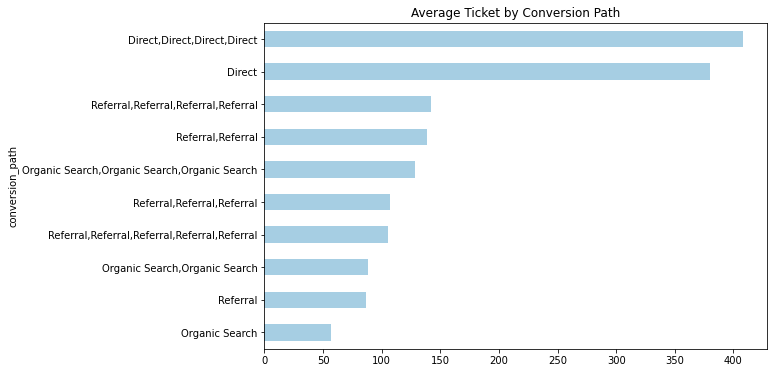

In [ ]:
#plot the top 10 conversion paths sorted by average ticket
top10_rev.sort_values("average_ticket", ascending=True).plot.barh(x='conversion_path', y='average_ticket',
                       title='Average Ticket by Conversion Path', legend=False, figsize=(9,6), cmap='Paired',)


The highest average ticket comprise visitors interacting 4 times through direct traffic and a single interaction with the same medium (average ticket revenue around 390 dollars). It represents 3 times higher revenue generated than conversions from 4 and 2 interactions through referral, for example.

### **Top 10 Conversion Paths by Number of Transaction** - One-Month Window


In [ ]:
#use magic command to display the results
%%bigquery --project practice-250123 
WITH top_10_conversion_paths_by_transactions as ( #include top 10 conversion paths by number of transactions only 
SELECT conversion_path,
count(transactions_revenue) as transactions_count #count transactions by conversion paths
FROM `practice-250123.Google_Analytics.Conversion_Path_Transactions_One_Month_Window` 
GROUP BY conversion_path
ORDER BY transactions_count DESC
LIMIT 10)


SELECT *
FROM top_10_conversion_paths_by_transactions

,conversion_path,transactions_count
0,Referral,181
1,Organic Search,138
2,"Referral,Referral",111
3,"Referral,Referral,Referral",67
4,Direct,66
5,"Organic Search,Organic Search",51
6,"Referral,Referral,Referral,Referral",44
7,"Referral,Referral,Referral,Referral,Referral",27
8,"Organic Search,Organic Search,Organic Search",27
9,"Direct,Direct",27


The conversion paths that brough the largest number of transactions are comprised of visitors who have had a single interaction through referral (181 conversions), followed by users having one single interaction through organic search (138 transactions).

### **Top 10 Transactions by Length of Conversion Path**
How many channels the visitor came from until placing an order

In [ ]:
%%bigquery --project practice-250123 
WITH top_10_conversion_paths_all_transactions as (
SELECT ARRAY_LENGTH(SPLIT(conversion_path,",")) as conversion_path_length, #split conversion path array in order to count the number of interactions/visits for the visitor to place an order 
count(transactions_revenue) as transactions_count #count the number of transactions by conversion path length
FROM `practice-250123.Google_Analytics.Conversion_Path_Transactions_One_Month_Window` 
GROUP BY 1
ORDER BY transactions_count DESC)


SELECT *
FROM top_10_conversion_paths_all_transactions

,conversion_path_length,transactions_count
0,1,419
1,2,240
2,3,146
3,4,95
4,5,54
5,6,31
6,8,20
7,7,18
8,10,14
9,12,8


The majority of the transacations come from up to 6 visitors interactions.

In [ ]:
#Here using another approach - with BigQuery Python Library 
sql= '''
SELECT *
FROM `practice-250123.Google_Analytics.Conversion_Path_Transactions_One_Month_Window` 
'''
alldf = client.query(sql).to_dataframe() #call BigQuery client to run the above query, saves it as a dataframe and assigns it to 'alldf' 
alldf.head()

,fullVisitorId,transaction_date,transactions_revenue,conversion_path
0,4376369621294658596,2017-07-11,640.16,"Organic Search,Organic Search,Organic Search"
1,9530536315613357862,2017-07-26,424.65,"Referral,Referral,Referral,Referral,Referral,R..."
2,8064625150033508396,2017-07-31,141.15,"Referral,Referral,Referral,Referral"
3,1447257816279888170,2017-07-27,115.70,"Referral,Referral,Referral,Referral,Referral"
4,9737166459620980047,2017-07-28,65.65,Paid Search


In [ ]:
#run basic statistics
alldf.describe()

,transactions_revenue
count,1074.000000
mean,157.942142
std,913.398365
min,2.990000
25%,28.360000
50%,49.210000
75%,103.372500
max,25249.260000


In [ ]:
#count the transactions revenue higher than $1,000 
revenue=alldf[alldf['transactions_revenue'] > 1000]
revenue_count=revenue.value_counts('transactions_revenue').sort_values(ascending=True)
revenue_count

transactions_revenue
25249.26    1
14060.31    1
4013.56     1
2935.61     1
2494.00     1
2408.20     1
1803.40     1
1511.00     1
1443.79     1
1337.28     1
1268.08     1
1100.30     1
1020.19     1
1006.78     1
dtype: int64

Only 14 transactions generated revenue greater than $1,000.

In [ ]:
#select only transactions where the revenue is less than or equal 2000 and run basics statistics
excldf = alldf[alldf['transactions_revenue']<=2000] 
excldf.describe()

,transactions_revenue
count,1068.000000
mean,110.925955
std,185.932809
min,2.990000
25%,28.285000
50%,49.125000
75%,102.057500
max,1803.400000


In [ ]:
#filter all the conversion paths on the top 10 revenue generating conversion paths
top10conv_excl=excldf[excldf.conversion_path.isin(top10_rev['conversion_path'])] 
top10conv_excl 

,fullVisitorId,transaction_date,transactions_revenue,conversion_path
0,4376369621294658596,2017-07-11,640.16,"Organic Search,Organic Search,Organic Search"
2,8064625150033508396,2017-07-31,141.15,"Referral,Referral,Referral,Referral"
3,1447257816279888170,2017-07-27,115.70,"Referral,Referral,Referral,Referral,Referral"
7,235352179583924900,2017-07-13,45.17,Organic Search
8,4702607995709465702,2017-07-24,44.93,"Referral,Referral"
...,...,...,...,...
1065,7745913892709272663,2017-07-31,43.99,"Organic Search,Organic Search"
1068,1053771337658446740,2017-07-28,24.19,"Referral,Referral"
1070,1383949428914741700,2017-07-09,19.99,Organic Search
1071,4577377706293036618,2017-07-13,19.99,Direct


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


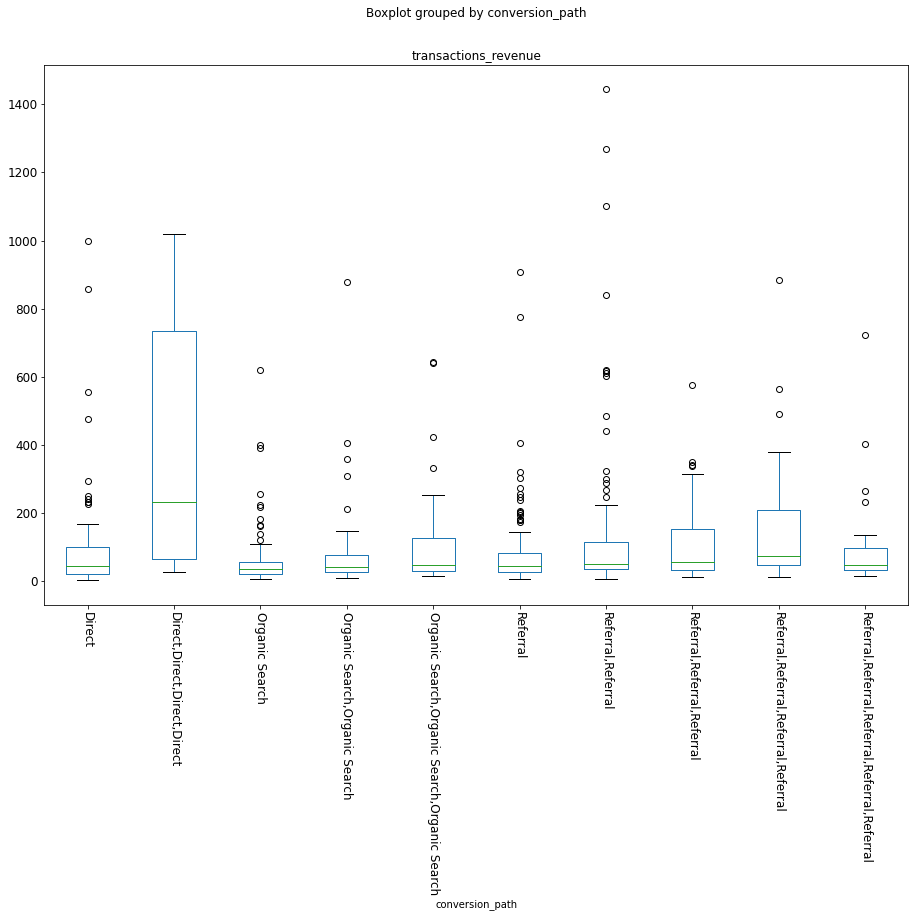

In [ ]:
#plot the distribution of the top 10 conversion paths by revenue up to $2000 by transaction
top10conv_excl.boxplot(by='conversion_path', column=['transactions_revenue'],fontsize='large',grid=False, figsize = [15,10], rot=-90)


In [ ]:
#group transactions revenue by conversion path
top10_conver=top10conv_excl.groupby(['conversion_path'])['transactions_revenue']
#run descriptive statistics and sort by highest mean 
top10_conver.describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
conversion_path,,,,,,,,
"Direct,Direct,Direct,Direct",8.0,408.183750,425.489099,27.59,64.0900,233.145,735.6200,1020.19
"Referral,Referral,Referral,Referral",44.0,141.770455,170.071870,11.49,47.4250,73.020,209.1275,883.25
"Referral,Referral",111.0,138.737568,241.104871,7.56,34.8300,51.800,114.3000,1443.79
"Organic Search,Organic Search,Organic Search",27.0,127.879630,178.683380,16.39,29.0800,46.980,125.6700,642.22
Direct,64.0,109.173906,181.944942,2.99,20.6500,45.680,100.6875,999.68
"Referral,Referral,Referral",67.0,107.332239,109.233854,13.60,32.6050,56.130,154.3600,575.50
"Referral,Referral,Referral,Referral,Referral",27.0,104.977778,151.773434,15.20,32.8700,48.340,96.3750,723.20
"Organic Search,Organic Search",51.0,88.485490,140.348867,9.49,26.1400,43.190,77.2200,877.15
Referral,180.0,74.035056,103.342334,8.03,25.9875,44.120,82.8325,907.50


Although the highest average revenue comes from visitors interacting 4 times through direct traffic, we have to take into consideration that only 1.4% of the transactions consist of this path, which means it does not happen so often.<br><br> Around 55% of all the transactions comprise of visitors of single interactions from referral and organic search. This means that the most frequent transacations generated, on average, a revenue of 74 dollars for conversions from referral, and 57 dollars from organic search. 